In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pp
%matplotlib inline
sns.set()

month_block = {0:'2013Jan', 1:'2013Feb', 2:'2013Mar', 3:'2013Apr', 4:'2013May', 5:'2013Jun',
              6:'2013Jul', 7:'2013Aug', 8:'2013Sep', 9:'2013Oct', 10:'2013Nov', 11:'2013Dec',
              12:'2014Jan', 13:'2014Feb', 14:'2014Mar', 15:'2014Apr', 16:'2014May', 17:'2014Jun',
              18:'2014Jul', 19:'2014Aug', 20:'2014Sep', 21:'2014Oct', 22:'2014Nov', 23:'2014Dec',
              24:'2015Jan', 25:'2015Feb', 26:'2015Mar', 27:'2015Apr', 28:'2015May', 29:'2015Jun',
              30:'2015Jul', 31:'2015Aug', 32:'2015Sep', 33:'2015Oct'}

months = {0:'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 4:'May', 5:'Jun',
              6:'Jul', 7:'Aug', 8:'Sep', 9:'Oct', 10:'Nov', 11:'Dec',
              12:'Jan', 13:'Feb', 14:'Mar', 15:'Apr', 16:'May', 17:'Jun',
              18:'Jul', 19:'Aug', 20:'Sep', 21:'Oct', 22:'Nov', 23:'Dec',
              24:'Jan', 25:'Feb', 26:'Mar', 27:'Apr', 28:'May', 29:'Jun',
              30:'Jul', 31:'Aug', 32:'Sep', 33:'Oct'}

In [2]:
df_item_categories = pd.read_csv("../Predicting_future_sales/data/item_categories.csv")
df_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [3]:
df_item_categories.shape

(84, 2)

In [4]:
df_items = pd.read_csv("../Predicting_future_sales/data/items.csv")
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
df_items.shape

(22170, 3)

In [6]:
df_sales_train = pd.read_csv("../Predicting_future_sales/data/sales_train.csv")
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
df_sales_train.shape

(2935849, 6)

In [8]:
# convert the date column to datetime
df_sales_train['date'] = pd.to_datetime(df_sales_train['date'], format='%d.%m.%Y', exact=True)
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [9]:
# converting date_block_num into month_blocks
df_sales_train['month_block'] = df_sales_train['date_block_num'].map(month_block).fillna(df_sales_train['date_block_num'])
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month_block
0,2013-01-02,0,59,22154,999.00,1.0,2013Jan
1,2013-01-03,0,25,2552,899.00,1.0,2013Jan
2,2013-01-05,0,25,2552,899.00,-1.0,2013Jan
3,2013-01-06,0,25,2554,1709.05,1.0,2013Jan
4,2013-01-15,0,25,2555,1099.00,1.0,2013Jan


In [10]:
# Reordering columns
df_sales_train = df_sales_train[['date',  'month_block', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']]
df_sales_train.head()

,date,month_block,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,2013Jan,0,59,22154,999.00,1.0
1,2013-01-03,2013Jan,0,25,2552,899.00,1.0
2,2013-01-05,2013Jan,0,25,2552,899.00,-1.0
3,2013-01-06,2013Jan,0,25,2554,1709.05,1.0
4,2013-01-15,2013Jan,0,25,2555,1099.00,1.0


In [11]:
df_sample_submission = pd.read_csv("../Predicting_future_sales/data/sample_submission.csv")
df_sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [12]:
df_sample_submission.shape

(214200, 2)

In [13]:
df_shops = pd.read_csv("../Predicting_future_sales/data/shops.csv")
df_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [14]:
df_shops.shape

(60, 2)

In [15]:
df_test = pd.read_csv("../Predicting_future_sales/data/test.csv")
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


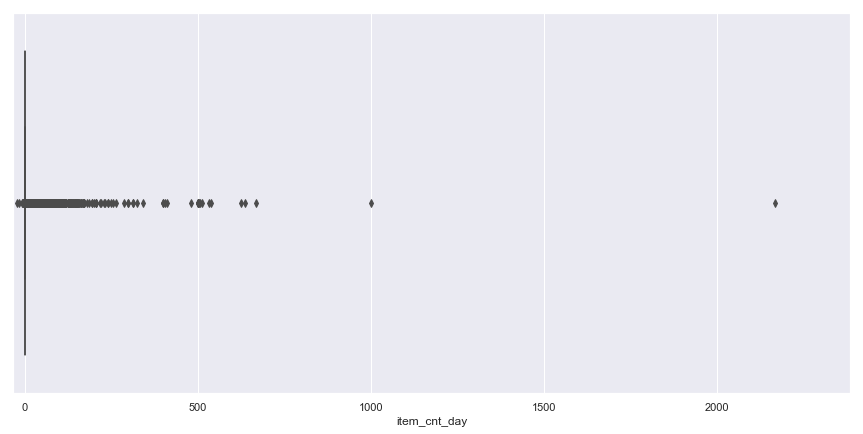

In [16]:
plt.figure(figsize=(15,7))
plt.xlim(df_sales_train.item_cnt_day.min()*1.5, df_sales_train.item_cnt_day.max()*1.1)
sns.boxplot(x=df_sales_train.item_cnt_day)

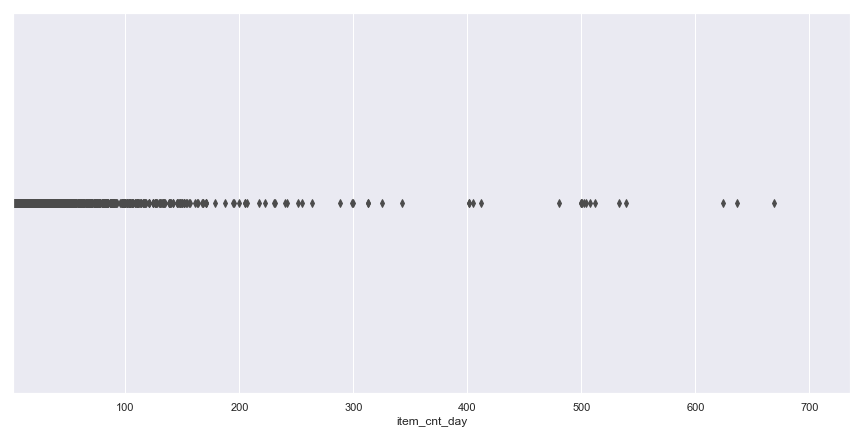

In [17]:
# Removing one data that is more than 2000 and all the data that are negative
df_sales_train = df_sales_train[df_sales_train.item_cnt_day<1000]
df_sales_train = df_sales_train[df_sales_train.item_cnt_day>=0]


plt.figure(figsize=(15,7))
plt.xlim(df_sales_train.item_cnt_day.min()*1.5, df_sales_train.item_cnt_day.max()*1.1)
sns.boxplot(x=df_sales_train.item_cnt_day)

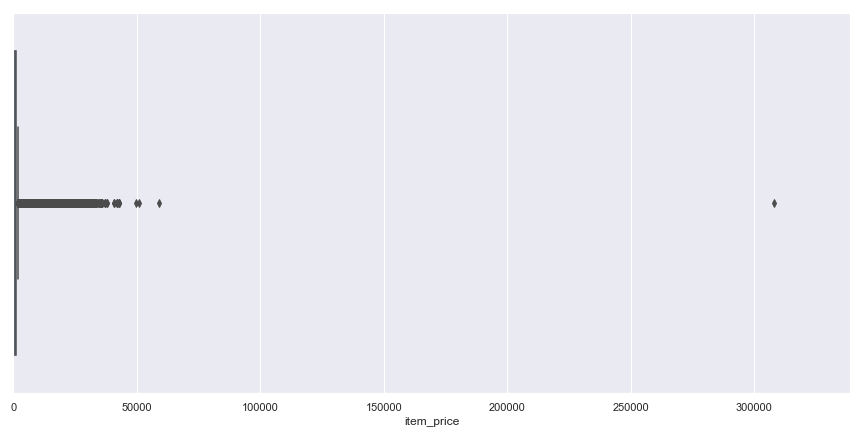

In [18]:
plt.figure(figsize=(15,7))
plt.xlim(df_sales_train.item_price.min()*1.5, df_sales_train.item_price.max()*1.1)
sns.boxplot(x=df_sales_train.item_price)

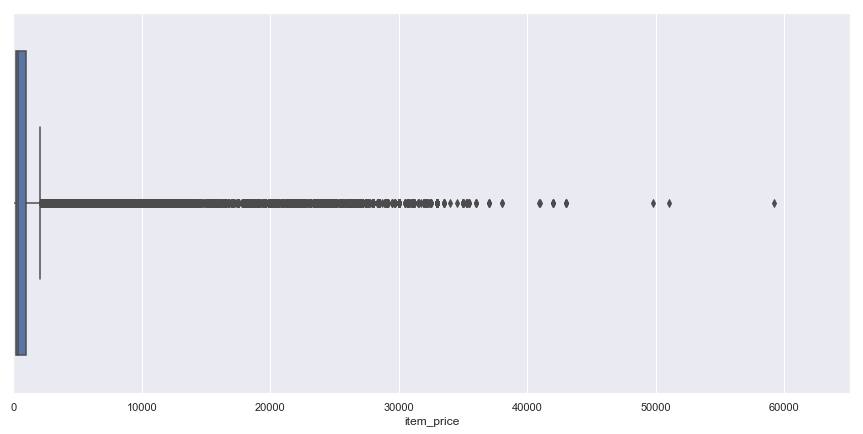

In [19]:
# Removing one data that costs more than 100000 and all the data that are negative
df_sales_train = df_sales_train[df_sales_train.item_price<60000]
df_sales_train = df_sales_train[df_sales_train.item_price>=0]

plt.figure(figsize=(15,7))
plt.xlim(df_sales_train.item_price.min()*1.5, df_sales_train.item_price.max()*1.1)
sns.boxplot(x=df_sales_train.item_price)

### Let's merge the dataframes

In [20]:
train_items_merge = pd.merge(df_sales_train, df_items, on='item_id', how='outer')
train_items_merge.head()

,date,month_block,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-01-02,2013Jan,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-23,2013Jan,0.0,24.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,2013-01-20,2013Jan,0.0,27.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,2013-01-02,2013Jan,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,2013-01-03,2013Jan,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [21]:
train_items_categories_merge = pd.merge(train_items_merge, df_item_categories, on='item_category_id', how='outer' )
train_items_categories_merge.head()

,date,month_block,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,2013-01-02,2013Jan,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-23,2013Jan,0.0,24.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-01-20,2013Jan,0.0,27.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-02,2013Jan,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-03,2013Jan,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [22]:
df = pd.merge(train_items_categories_merge, df_shops, on='shop_id', how='outer')
df.head()

,date,month_block,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,2013Jan,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-04-26,2013Apr,3.0,59.0,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,2013-06-26,2013Jun,5.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,2013-07-20,2013Jul,6.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,2013-09-14,2013Sep,8.0,59.0,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


In [23]:
df.dtypes # information about data types of columns

date                  datetime64[ns]
month_block                   object
date_block_num               float64
shop_id                      float64
item_id                        int64
item_price                   float64
item_cnt_day                 float64
item_name                     object
item_category_id               int64
item_category_name            object
shop_name                     object
dtype: object

In [24]:
df.shape

(2928856, 11)

In [25]:
df = df.dropna()
df.shape

(2928489, 11)

In [26]:
df_sales_train.shape

(2928489, 7)

In [27]:
df = df.sort_values(by='date')
df = df.reset_index(drop=True)
df.head()

,date,month_block,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-01,2013Jan,0.0,19.0,6468,449.0,1.0,"Sims 3 [PC, Jewel, русская версия]",30,Игры PC - Стандартные издания,"Курск ТЦ ""Пушкинский"""
1,2013-01-01,2013Jan,0.0,15.0,11041,349.0,2.0,ДЖУНГЛИ,40,Кино - DVD,"Калуга ТРЦ ""XXI век"""
2,2013-01-01,2013Jan,0.0,46.0,8069,449.0,1.0,ЁЛКИ 1+2,40,Кино - DVD,"Сергиев Посад ТЦ ""7Я"""
3,2013-01-01,2013Jan,0.0,28.0,13973,1399.0,1.0,ЛОРАКС (3D BD+BD+ DVD),38,Кино - Blu-Ray 3D,"Москва ТЦ ""МЕГА Теплый Стан"" II"
4,2013-01-01,2013Jan,0.0,51.0,15070,183.0,1.0,Меч и Магия: Герои 6. Набор приключений (Допол...,30,Игры PC - Стандартные издания,"Тюмень ТЦ ""Зеленый Берег"""


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928489 entries, 0 to 2928488
Data columns (total 11 columns):
date                  datetime64[ns]
month_block           object
date_block_num        float64
shop_id               float64
item_id               int64
item_price            float64
item_cnt_day          float64
item_name             object
item_category_id      int64
item_category_name    object
shop_name             object
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 245.8+ MB


In [29]:
df['date_block_num'] = df['date_block_num'].astype(int)
df['shop_id'] = df['shop_id'].astype(int)
df.head()

,date,month_block,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-01,2013Jan,0,19,6468,449.0,1.0,"Sims 3 [PC, Jewel, русская версия]",30,Игры PC - Стандартные издания,"Курск ТЦ ""Пушкинский"""
1,2013-01-01,2013Jan,0,15,11041,349.0,2.0,ДЖУНГЛИ,40,Кино - DVD,"Калуга ТРЦ ""XXI век"""
2,2013-01-01,2013Jan,0,46,8069,449.0,1.0,ЁЛКИ 1+2,40,Кино - DVD,"Сергиев Посад ТЦ ""7Я"""
3,2013-01-01,2013Jan,0,28,13973,1399.0,1.0,ЛОРАКС (3D BD+BD+ DVD),38,Кино - Blu-Ray 3D,"Москва ТЦ ""МЕГА Теплый Стан"" II"
4,2013-01-01,2013Jan,0,51,15070,183.0,1.0,Меч и Магия: Герои 6. Набор приключений (Допол...,30,Игры PC - Стандартные издания,"Тюмень ТЦ ""Зеленый Берег"""


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928489 entries, 0 to 2928488
Data columns (total 11 columns):
date                  datetime64[ns]
month_block           object
date_block_num        int32
shop_id               int32
item_id               int64
item_price            float64
item_cnt_day          float64
item_name             object
item_category_id      int64
item_category_name    object
shop_name             object
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(4)
memory usage: 223.4+ MB


In [31]:
df_date = pd.DataFrame([{'date': k,
                        'item_cnt_day': v.item_cnt_day.sum()}
                       for k, v in df.groupby(['date'])],
                      columns=['date', 'item_cnt_day'])

df_date.head()

,date,item_cnt_day
0,2013-01-01,1957.0
1,2013-01-02,8232.0
2,2013-01-03,7444.0
3,2013-01-04,6628.0
4,2013-01-05,6360.0


In [32]:
df_date.shape

(1034, 2)

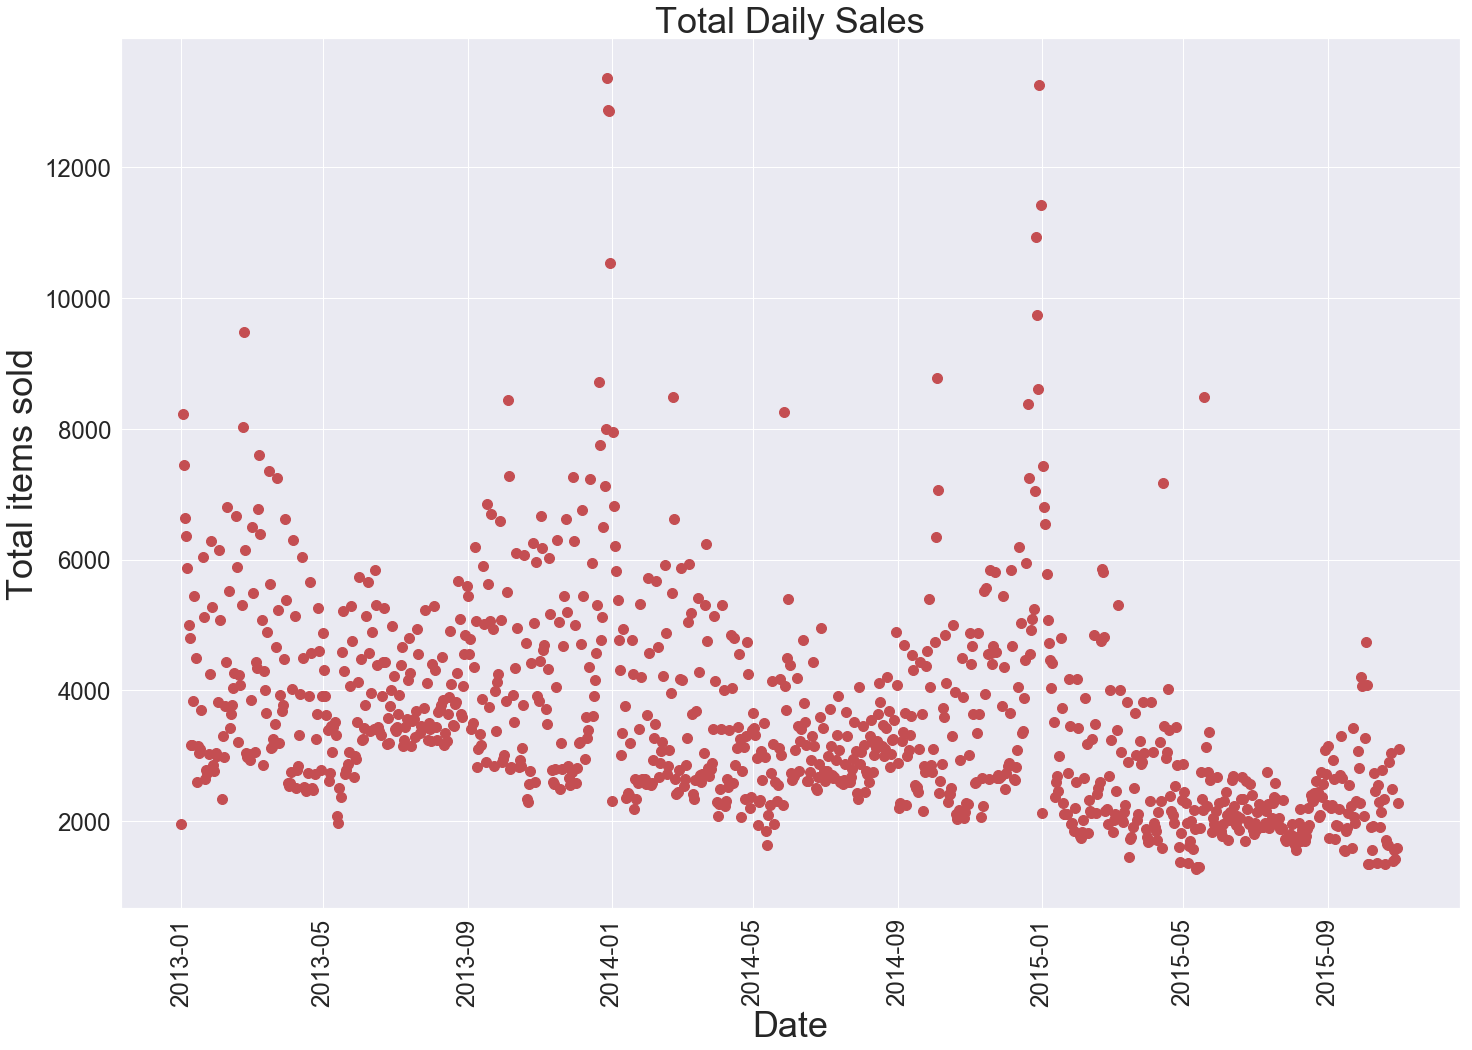

In [33]:
x = df_date['date']
y = df_date['item_cnt_day']
plt.subplots(figsize=(24,16))
_ = plt.plot(x, y, marker='.', markersize=20, linestyle='none', color='r')
_ = plt.xlabel('Date', fontsize=36)
_ = plt.ylabel('Total items sold', fontsize=36)
_ = plt.xticks(rotation=90, fontsize=24)
#plt.xticks(np.arange(1, 1034, 20))
_ = plt.yticks(fontsize=24)
_ = plt.title('Total Daily Sales', fontsize=36)
plt.show()

In [34]:
df_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum()}
                       for k, v in df.groupby(['date_block_num'])],
                      columns=['date_block_num', 'item_cnt_day'])

df_month.head()

,date_block_num,item_cnt_day
0,0,131850.0
1,1,128382.0
2,2,147438.0
3,3,107439.0
4,4,107147.0


In [35]:
df_month['month'] = df_month['date_block_num'].map(month_block).fillna(df_month['date_block_num'])
df_month = df_month[['month', 'date_block_num', 'item_cnt_day']]
df_month.head()

,month,date_block_num,item_cnt_day
0,2013Jan,0,131850.0
1,2013Feb,1,128382.0
2,2013Mar,2,147438.0
3,2013Apr,3,107439.0
4,2013May,4,107147.0


In [36]:
df_monthly_average = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum()/60} # number of shops = 60
                       for k, v in df.groupby(['date_block_num'])],
                      columns=['date_block_num', 'item_cnt_day'])
df_monthly_average['month'] = df_monthly_average['date_block_num'].map(month_block).fillna(df_monthly_average['date_block_num'])
df_monthly_average = df_monthly_average[['month', 'date_block_num', 'item_cnt_day']]
df_monthly_average.head()

,month,date_block_num,item_cnt_day
0,2013Jan,0,2197.500000
1,2013Feb,1,2139.700000
2,2013Mar,2,2457.300000
3,2013Apr,3,1790.650000
4,2013May,4,1785.783333


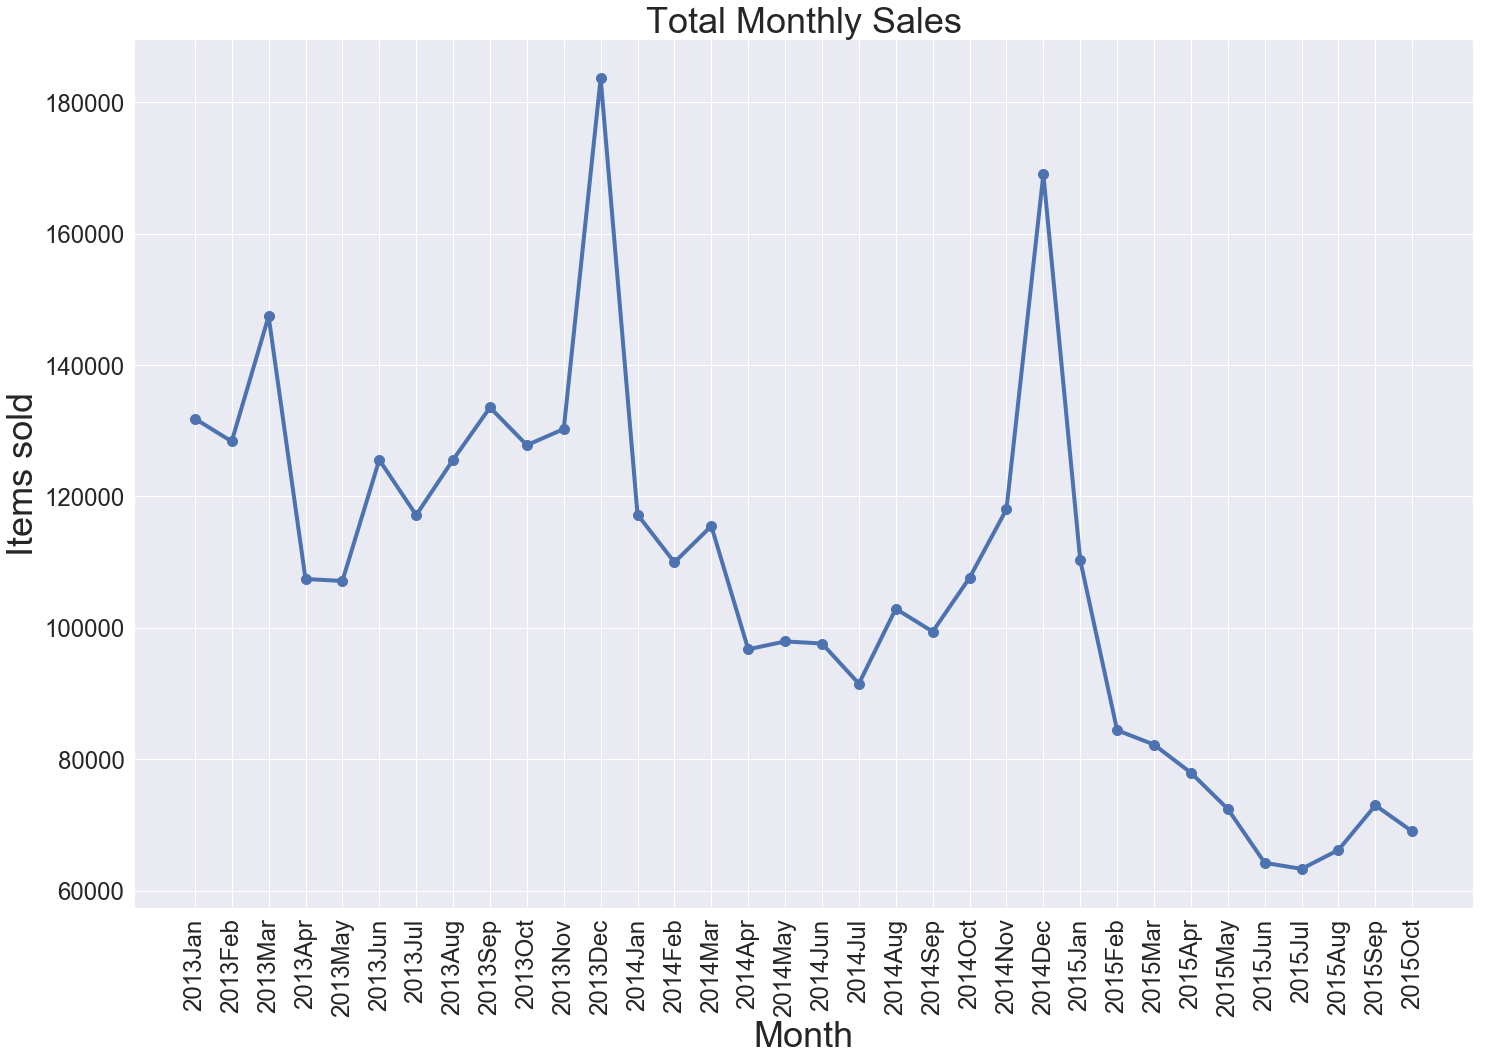

In [37]:
x = df_month['month']
y = df_month['item_cnt_day']
plt.subplots(figsize=(24,16))
_ = plt.plot(x, y, marker='.', markersize=20, linewidth=4)#, linestyle='none')
_ = plt.xlabel('Month', fontsize=36)
_ = plt.xticks(rotation=90, fontsize=24)
_ = plt.ylabel('Items sold', fontsize=36)
_ = plt.yticks(fontsize=24)
_ = plt.title('Total Monthly Sales', fontsize=36)
plt.show()

In [38]:
df_shop = pd.DataFrame([{'shop_id': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df.groupby(['shop_id'])],
                      columns=['shop_id', 'item_cnt_day', 'price'])

df_shop.head()

,shop_id,item_cnt_day,price
0,0,11705.0,6.637370e+06
1,1,6311.0,3.238207e+06
2,2,30706.0,4.421349e+07
3,3,28475.0,3.036145e+07
4,4,44069.0,4.071549e+07


In [39]:
df_date_price = pd.DataFrame([{'date': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df.groupby(['date'])],
                      columns=['date', 'item_cnt_day', 'price'])

df_date_price.head()

,date,item_cnt_day,price
0,2013-01-01,1957.0,1371116.50
1,2013-01-02,8232.0,6070414.01
2,2013-01-03,7444.0,5460386.50
3,2013-01-04,6628.0,4769843.50
4,2013-01-05,6360.0,4600005.40


In [40]:
df_month_price = pd.DataFrame([{'month_block': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df.groupby(['month_block'])],
                      columns=['month_block', 'item_cnt_day', 'price'])

df_month_price.head()

,month_block,item_cnt_day,price
0,2013Apr,107439.0,6.945713e+07
1,2013Aug,125586.0,7.458699e+07
2,2013Dec,183669.0,2.077308e+08
3,2013Feb,128382.0,9.096449e+07
4,2013Jan,131850.0,9.239909e+07


In [41]:
# sort the dataframe to get top performing shops
df_top_shops_items = df_shop.sort_values(by=['item_cnt_day'], ascending=False)
df_top_shops_items

,shop_id,item_cnt_day,price
31,31,311230.0,2.356611e+08
25,25,242237.0,2.169676e+08
54,54,186149.0,1.424218e+08
28,28,184777.0,1.601296e+08
42,42,145195.0,1.522791e+08
57,57,141424.0,1.133351e+08
27,27,136815.0,1.408849e+08
6,6,100757.0,9.847755e+07
58,58,81908.0,6.892190e+07
46,46,79092.0,7.434449e+07


In [42]:
df31 = df[df['shop_id'] == 31]
df25 = df[df['shop_id'] == 25]
df28 = df[df['shop_id'] == 28]
df42 = df[df['shop_id'] == 42]
df54 = df[df['shop_id'] == 54]
df57 = df[df['shop_id'] == 57]
df27 = df[df['shop_id'] == 27]
df6 = df[df['shop_id'] == 6]
df58 = df[df['shop_id'] == 58]
df46 = df[df['shop_id'] == 46]
print(df31.shape, df25.shape, df28.shape, df42.shape, df54.shape, 
      df57.shape, df27.shape, df6.shape, df58.shape, df46.shape)
df31.head()

(235185, 11) (185788, 11) (142018, 11) (109002, 11) (143124, 11) (117114, 11) (105209, 11) (82402, 11) (71268, 11) (66219, 11)


,date,month_block,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
1664,2013-01-02,2013Jan,0,31,3647,399.0,1.0,GUETTA DAVID One More Love 2CD,55,Музыка - CD локального производства,"Москва ТЦ ""Семеновский"""
1665,2013-01-02,2013Jan,0,31,1913,249.0,1.0,"Bestseller. Rome: Total War Gold Edition [PC, ...",30,Игры PC - Стандартные издания,"Москва ТЦ ""Семеновский"""
1669,2013-01-02,2013Jan,0,31,19203,199.0,1.0,СУПЕР МАЙК,40,Кино - DVD,"Москва ТЦ ""Семеновский"""
1677,2013-01-02,2013Jan,0,31,4100,399.0,1.0,KNOPFLER MARK Privateering 2CD,55,Музыка - CD локального производства,"Москва ТЦ ""Семеновский"""
1745,2013-01-02,2013Jan,0,31,17317,399.0,1.0,ПРЕЗИДЕНТ ЛИНКОЛЬН: ОХОТНИК НА ВАМПИРОВ,40,Кино - DVD,"Москва ТЦ ""Семеновский"""


In [43]:
df31_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df31.groupby(['date_block_num'])],
                      columns=['date_block_num', 'item_cnt_day', 'price'])
df31_month['month'] = df31_month['date_block_num'].map(month_block).fillna(df31['date_block_num'])
df31_month = df31_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
##################################################################################################
df25_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df25.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df25_month['month'] = df25_month['date_block_num'].map(month_block).fillna(df25['date_block_num'])
df25_month = df25_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
##################################################################################################
df28_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df28.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df28_month['month'] = df28_month['date_block_num'].map(month_block).fillna(df28['date_block_num'])
df28_month = df28_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
##################################################################################################
df42_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df42.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df42_month['month'] = df42_month['date_block_num'].map(month_block).fillna(df42['date_block_num'])
df42_month = df42_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
##################################################################################################
df54_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df54.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df54_month['month'] = df54_month['date_block_num'].map(month_block).fillna(df54['date_block_num'])
df54_month = df54_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
##################################################################################################
df57_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df57.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df57_month['month'] = df57_month['date_block_num'].map(month_block).fillna(df57['date_block_num'])
df57_month = df57_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
##################################################################################################
df27_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df27.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df27_month['month'] = df27_month['date_block_num'].map(month_block).fillna(df27['date_block_num'])
df27_month = df27_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
##################################################################################################
df6_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df6.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df6_month['month'] = df6_month['date_block_num'].map(month_block).fillna(df6['date_block_num'])
df6_month = df6_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
##################################################################################################
df58_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df58.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df58_month['month'] = df58_month['date_block_num'].map(month_block).fillna(df58['date_block_num'])
df58_month = df58_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
##################################################################################################
df46_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df46.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df46_month['month'] = df46_month['date_block_num'].map(month_block).fillna(df46['date_block_num'])
df46_month = df46_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
##################################################################################################

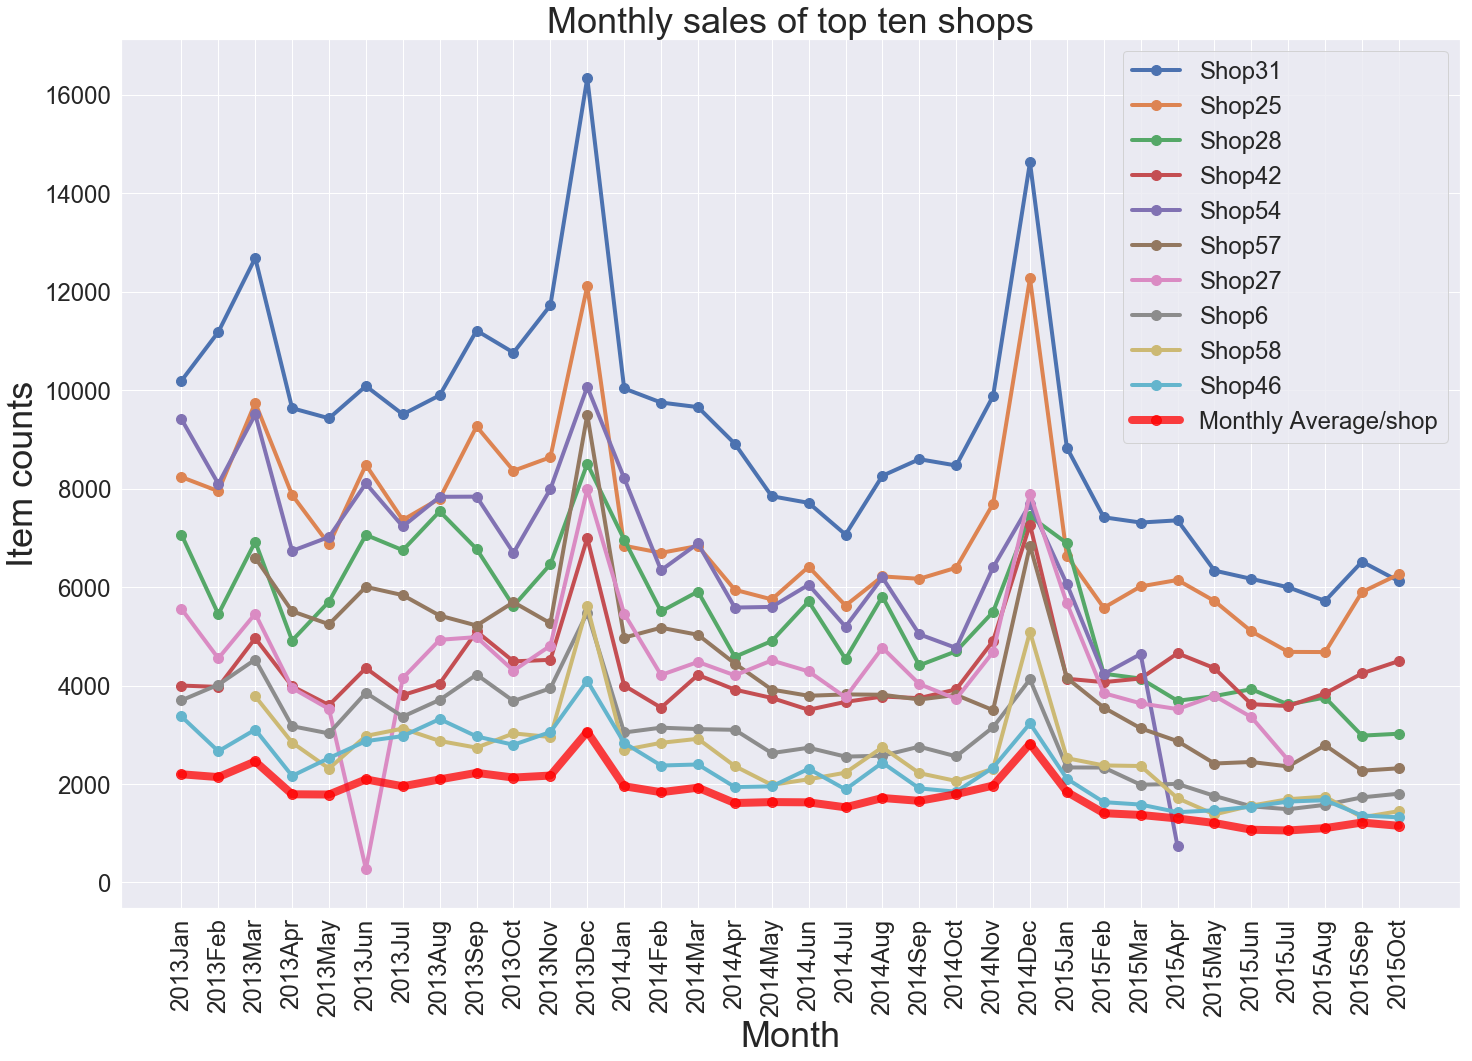

In [44]:
plt.subplots(figsize=(24,16))

_ = plt.plot(df31_month['month'], df31_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Shop31')
_ = plt.plot(df25_month['month'], df25_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Shop25')
_ = plt.plot(df28_month['month'], df28_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Shop28')
_ = plt.plot(df42_month['month'], df42_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Shop42')
_ = plt.plot(df54_month['month'], df54_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Shop54')
_ = plt.plot(df57_month['month'], df57_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Shop57')
_ = plt.plot(df27_month['month'], df27_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Shop27')
_ = plt.plot(df6_month['month'], df6_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Shop6')
_ = plt.plot(df58_month['month'], df58_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Shop58')
_ = plt.plot(df46_month['month'], df46_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Shop46')
_ = plt.plot(df_monthly_average['month'], df_monthly_average['item_cnt_day'], 
             marker='.', markersize=20, linewidth=8, label='Monthly Average/shop', color='red', alpha=0.75)
plt.xlabel('Month', fontsize=36)
plt.ylabel('Item counts', fontsize=36)
_ = plt.xticks(rotation=90, fontsize=24)
_ = plt.yticks( fontsize=24)
_ = plt.legend(fontsize=24)
_ = plt.title('Monthly sales of top ten shops', fontsize=36)
plt.show()

In [45]:
df_item = pd.DataFrame([{'item_id': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df.groupby(['item_id'])],
                      columns=['item_id', 'item_cnt_day', 'price'])
df_item.head(10)

,item_id,item_cnt_day,price
0,0,1.0,58.0
1,1,6.0,26940.0
2,2,2.0,116.0
3,3,2.0,158.0
4,4,1.0,58.0
5,5,1.0,28.0
6,6,1.0,100.0
7,7,1.0,28.0
8,8,2.0,116.0
9,9,1.0,58.0


In [46]:
# sort the dataframe to get top performing items
df_top_items = df_item.sort_values(by=['item_cnt_day'], ascending=False)
df_top_items.head(10)

,item_id,item_cnt_day,price
20598,20949,186660.0,9.249537e+05
2749,2808,17255.0,1.686327e+07
3654,3732,16676.0,4.370690e+07
17415,17717,15830.0,1.720083e+07
5717,5822,14522.0,1.541673e+07
3656,3734,11733.0,3.118972e+07
6542,6675,10315.0,2.199861e+08
3653,3731,10105.0,1.999558e+07
1814,1855,10041.0,9.365399e+06
16490,16787,9255.0,2.197261e+07


In [47]:
df20949 = df[df['item_id'] == 20949]
df2808 = df[df['item_id'] == 2808]
df3732 = df[df['item_id'] == 3732]
df17717 = df[df['item_id'] == 17717]
df5822 = df[df['item_id'] == 5822]
df3734 = df[df['item_id'] == 3734]
df6675 = df[df['item_id'] == 6675]
df3731 = df[df['item_id'] == 3731]
df1855 = df[df['item_id'] == 1855]
df16787 = df[df['item_id'] == 16787]

In [48]:
df20949_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df20949.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df20949_month['month'] = df20949_month['date_block_num'].map(month_block).fillna(df20949['date_block_num'])
df20949_month = df20949_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
df20949_month = df20949_month.sort_values(by='date_block_num')
##################################################################################################
df2808_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df2808.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df2808_month['month'] = df2808_month['date_block_num'].map(month_block).fillna(df2808['date_block_num'])
df2808_month = df2808_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
df2808_month = df2808_month.sort_values(by='date_block_num')
##################################################################################################
df3732_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df3732.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df3732_month['month'] = df3732_month['date_block_num'].map(month_block).fillna(df3732['date_block_num'])
df3732_month = df3732_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
df3732_month = df3732_month.sort_values(by='date_block_num')
##################################################################################################
df17717_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df17717.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df17717_month['month'] = df17717_month['date_block_num'].map(month_block).fillna(df17717['date_block_num'])
df17717_month = df17717_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
df17717_month = df17717_month.sort_values(by='date_block_num')
##################################################################################################
df5822_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df5822.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df5822_month['month'] = df5822_month['date_block_num'].map(month_block).fillna(df5822['date_block_num'])
df5822_month = df5822_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
df5822_month = df5822_month.sort_values(by='date_block_num')
##################################################################################################
df3734_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df3734.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df3734_month['month'] = df3734_month['date_block_num'].map(month_block).fillna(df3734['date_block_num'])
df3734_month = df3734_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
df3734_month = df3734_month.sort_values(by='date_block_num')
##################################################################################################
df6675_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df6675.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df6675_month['month'] = df6675_month['date_block_num'].map(month_block).fillna(df6675['date_block_num'])
df6675_month = df6675_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
df6675_month = df6675_month.sort_values(by='date_block_num')
##################################################################################################
df3731_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df3731.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df3731_month['month'] = df3731_month['date_block_num'].map(month_block).fillna(df3731['date_block_num'])
df3731_month = df3731_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
df3731_month = df3731_month.sort_values(by='date_block_num')
##################################################################################################
df1855_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df1855.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df1855_month['month'] = df1855_month['date_block_num'].map(month_block).fillna(df1855['date_block_num'])
df1855_month = df1855_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
df1855_month = df1855_month.sort_values(by='date_block_num')
##################################################################################################
df16787_month = pd.DataFrame([{'date_block_num': k,
                        'item_cnt_day': v.item_cnt_day.sum(),
                        'price': (v.item_price * v.item_cnt_day).sum()}
                       for k, v in df16787.groupby(['date_block_num'])],
                      columns=['month','date_block_num', 'item_cnt_day', 'price'])
df16787_month['month'] = df16787_month['date_block_num'].map(month_block).fillna(df16787['date_block_num'])
df16787_month = df16787_month[['month', 'date_block_num', 'item_cnt_day', 'price']]
df16787_month = df16787_month.sort_values(by='date_block_num')
##################################################################################################

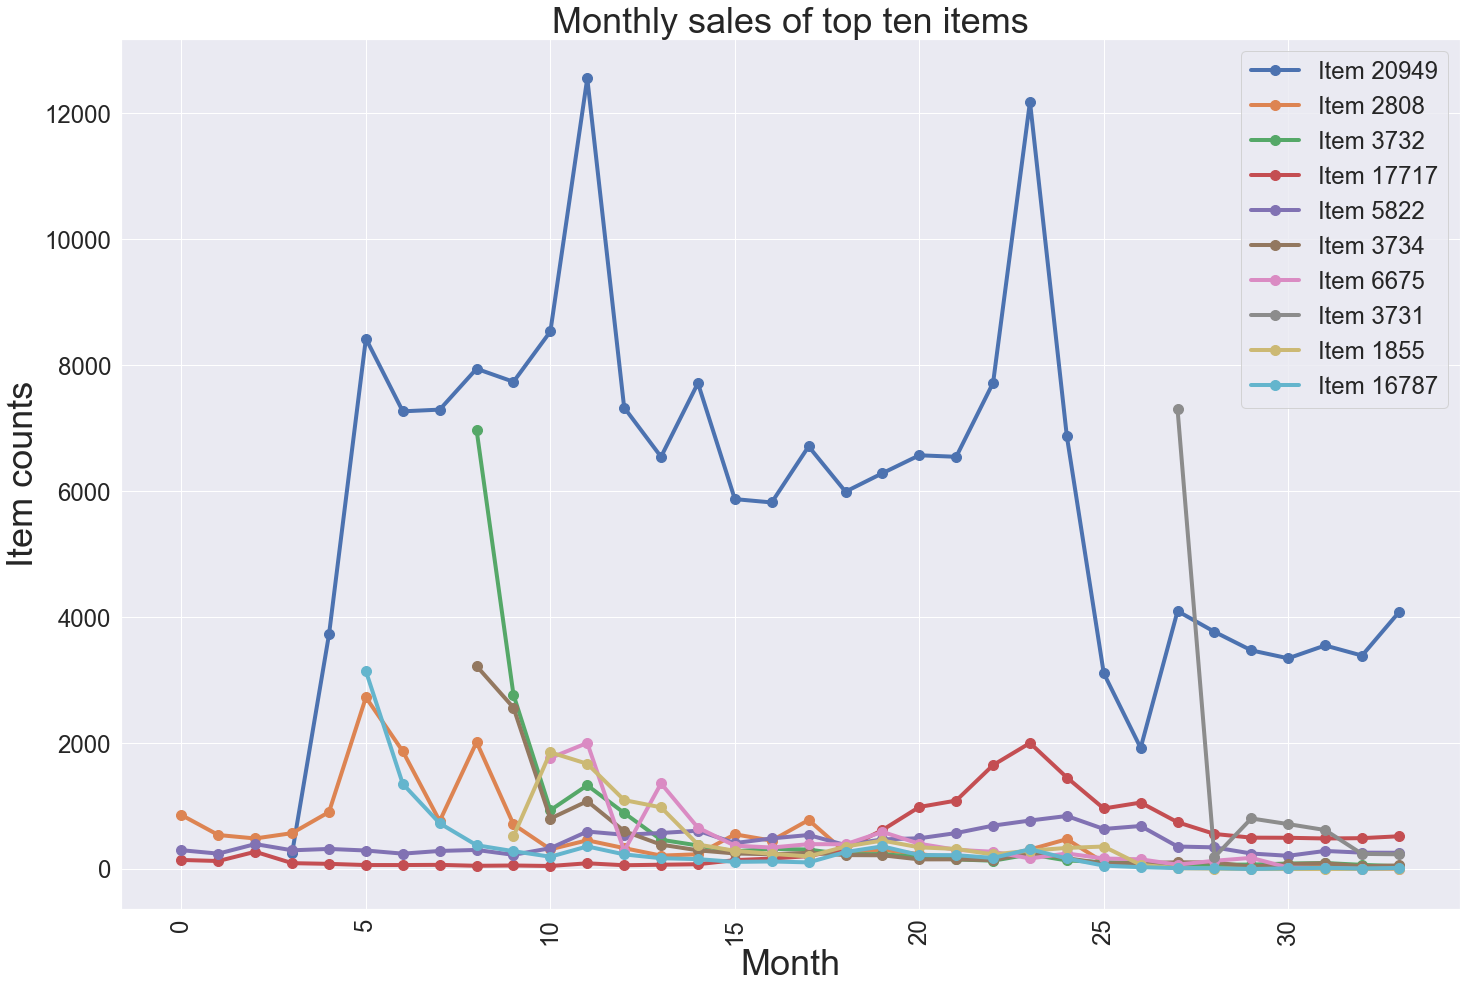

In [49]:
plt.subplots(figsize=(24,16))

_ = plt.plot(df20949_month['date_block_num'], df20949_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Item 20949')
_ = plt.plot(df2808_month['date_block_num'], df2808_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Item 2808')
_ = plt.plot(df3732_month['date_block_num'], df3732_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Item 3732')
_ = plt.plot(df17717_month['date_block_num'], df17717_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Item 17717')
_ = plt.plot(df5822_month['date_block_num'], df5822_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Item 5822')
_ = plt.plot(df3734_month['date_block_num'], df3734_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Item 3734')
_ = plt.plot(df6675_month['date_block_num'], df6675_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Item 6675')
_ = plt.plot(df3731_month['date_block_num'], df3731_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Item 3731')
_ = plt.plot(df1855_month['date_block_num'], df1855_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Item 1855')
_ = plt.plot(df16787_month['date_block_num'], df16787_month['item_cnt_day'], 
             marker='.', markersize=20, linewidth=4, label='Item 16787')
plt.xlabel('Month', fontsize=36)
plt.ylabel('Item counts', fontsize=36)
_ = plt.xticks(rotation=90, fontsize=24)
_ = plt.yticks( fontsize=24)
plt.legend(fontsize=24)
plt.title('Monthly sales of top ten items', fontsize=36)
plt.show()

In [50]:
df_sales_train.head()

,date,month_block,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,2013Jan,0,59,22154,999.00,1.0
1,2013-01-03,2013Jan,0,25,2552,899.00,1.0
3,2013-01-06,2013Jan,0,25,2554,1709.05,1.0
4,2013-01-15,2013Jan,0,25,2555,1099.00,1.0
5,2013-01-10,2013Jan,0,25,2564,349.00,1.0


In [51]:
df_sales_train.shape

(2928489, 7)

In [52]:
df_grouped = pd.DataFrame([{'date_block_num': k,
                              'item_cnt_day': v.item_cnt_day.sum()}
                       for k, v in df_sales_train.groupby(['date_block_num'])],
                      columns=['date_block_num', 'item_cnt_day'])
df_grouped.head()

,date_block_num,item_cnt_day
0,0,131850.0
1,1,128382.0
2,2,147438.0
3,3,107439.0
4,4,107147.0


In [53]:
# converting date_block_num into months
df_grouped['month'] = df_grouped['date_block_num'].map(months).fillna(df_sales_train['date_block_num'])
df_grouped['month_block'] = df_grouped['date_block_num'].map(month_block).fillna(df_sales_train['date_block_num'])

# Reordering columns
df_grouped = df_grouped[['date_block_num', 'month', 'month_block','item_cnt_day']]

df_grouped.head()

,date_block_num,month,month_block,item_cnt_day
0,0,Jan,2013Jan,131850.0
1,1,Feb,2013Feb,128382.0
2,2,Mar,2013Mar,147438.0
3,3,Apr,2013Apr,107439.0
4,4,May,2013May,107147.0


In [54]:
# Rename column
df_grouped.columns = ['date_block_num', 'month', 'month_block', 'item_cnt_month']
df_grouped.head()

,date_block_num,month,month_block,item_cnt_month
0,0,Jan,2013Jan,131850.0
1,1,Feb,2013Feb,128382.0
2,2,Mar,2013Mar,147438.0
3,3,Apr,2013Apr,107439.0
4,4,May,2013May,107147.0


In [55]:
df_2013 = df_grouped[df_grouped['date_block_num'].isin([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])]
df_2014 = df_grouped[df_grouped['date_block_num'].isin([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])]
df_2015 = df_grouped[df_grouped['date_block_num'].isin([24, 25, 26, 27, 28, 29, 30, 31, 32, 33])]

In [56]:
df_2013.head()

,date_block_num,month,month_block,item_cnt_month
0,0,Jan,2013Jan,131850.0
1,1,Feb,2013Feb,128382.0
2,2,Mar,2013Mar,147438.0
3,3,Apr,2013Apr,107439.0
4,4,May,2013May,107147.0


In [57]:
df_2014.head()

,date_block_num,month,month_block,item_cnt_month
12,12,Jan,2014Jan,117243.0
13,13,Feb,2014Feb,109975.0
14,14,Mar,2014Mar,115501.0
15,15,Apr,2014Apr,96744.0
16,16,May,2014May,97938.0


In [58]:
df_2015.head()

,date_block_num,month,month_block,item_cnt_month
24,24,Jan,2015Jan,110299.0
25,25,Feb,2015Feb,84419.0
26,26,Mar,2015Mar,82233.0
27,27,Apr,2015Apr,77948.0
28,28,May,2015May,72435.0


In [59]:
df_merged = pd.merge(df_2013, df_2014, on='month', how='left')
df_merged

,date_block_num_x,month,month_block_x,item_cnt_month_x,date_block_num_y,month_block_y,item_cnt_month_y
0,0,Jan,2013Jan,131850.0,12,2014Jan,117243.0
1,1,Feb,2013Feb,128382.0,13,2014Feb,109975.0
2,2,Mar,2013Mar,147438.0,14,2014Mar,115501.0
3,3,Apr,2013Apr,107439.0,15,2014Apr,96744.0
4,4,May,2013May,107147.0,16,2014May,97938.0
5,5,Jun,2013Jun,125583.0,17,2014Jun,97623.0
6,6,Jul,2013Jul,117165.0,18,2014Jul,91505.0
7,7,Aug,2013Aug,125586.0,19,2014Aug,102910.0
8,8,Sep,2013Sep,133551.0,20,2014Sep,99427.0
9,9,Oct,2013Oct,127815.0,21,2014Oct,107623.0


In [60]:
df_merged = pd.merge(df_merged, df_2015, on='month', how='left')
df_merged

,date_block_num_x,month,month_block_x,item_cnt_month_x,date_block_num_y,month_block_y,item_cnt_month_y,date_block_num,month_block,item_cnt_month
0,0,Jan,2013Jan,131850.0,12,2014Jan,117243.0,24.0,2015Jan,110299.0
1,1,Feb,2013Feb,128382.0,13,2014Feb,109975.0,25.0,2015Feb,84419.0
2,2,Mar,2013Mar,147438.0,14,2014Mar,115501.0,26.0,2015Mar,82233.0
3,3,Apr,2013Apr,107439.0,15,2014Apr,96744.0,27.0,2015Apr,77948.0
4,4,May,2013May,107147.0,16,2014May,97938.0,28.0,2015May,72435.0
5,5,Jun,2013Jun,125583.0,17,2014Jun,97623.0,29.0,2015Jun,64237.0
6,6,Jul,2013Jul,117165.0,18,2014Jul,91505.0,30.0,2015Jul,63316.0
7,7,Aug,2013Aug,125586.0,19,2014Aug,102910.0,31.0,2015Aug,66196.0
8,8,Sep,2013Sep,133551.0,20,2014Sep,99427.0,32.0,2015Sep,72989.0
9,9,Oct,2013Oct,127815.0,21,2014Oct,107623.0,33.0,2015Oct,69015.0


In [61]:
df_merged_trimmed  = df_merged.drop(['date_block_num_x','date_block_num_y', 'date_block_num',
                                    'month_block_x', 'month_block_y', 'month_block'], axis=1)
df_merged_trimmed

,month,item_cnt_month_x,item_cnt_month_y,item_cnt_month
0,Jan,131850.0,117243.0,110299.0
1,Feb,128382.0,109975.0,84419.0
2,Mar,147438.0,115501.0,82233.0
3,Apr,107439.0,96744.0,77948.0
4,May,107147.0,97938.0,72435.0
5,Jun,125583.0,97623.0,64237.0
6,Jul,117165.0,91505.0,63316.0
7,Aug,125586.0,102910.0,66196.0
8,Sep,133551.0,99427.0,72989.0
9,Oct,127815.0,107623.0,69015.0


In [62]:
df_merged_trimmed.columns = ['month', 'item_cnt_month_2013', 'item_cnt_month_2014', 'item_cnt_month_2015', ]
df_merged_trimmed

,month,item_cnt_month_2013,item_cnt_month_2014,item_cnt_month_2015
0,Jan,131850.0,117243.0,110299.0
1,Feb,128382.0,109975.0,84419.0
2,Mar,147438.0,115501.0,82233.0
3,Apr,107439.0,96744.0,77948.0
4,May,107147.0,97938.0,72435.0
5,Jun,125583.0,97623.0,64237.0
6,Jul,117165.0,91505.0,63316.0
7,Aug,125586.0,102910.0,66196.0
8,Sep,133551.0,99427.0,72989.0
9,Oct,127815.0,107623.0,69015.0


In [63]:
df_merged_trimmed.describe()

,item_cnt_month_2013,item_cnt_month_2014,item_cnt_month_2015
count,12.000000,12.000000,10.000000
mean,130491.250000,110299.500000,76308.700000
std,20090.783677,20489.724451,13963.957614
min,107147.000000,91505.000000,63316.000000
25%,123478.500000,97859.250000,66900.750000
50%,128098.500000,105266.500000,72712.000000
75%,132275.250000,115936.500000,81161.750000
max,183669.000000,169055.000000,110299.000000


In [64]:
df_merged_trimmed.corr()

,item_cnt_month_2013,item_cnt_month_2014,item_cnt_month_2015
item_cnt_month_2013,1.000000,0.915356,0.309721
item_cnt_month_2014,0.915356,1.000000,0.757502
item_cnt_month_2015,0.309721,0.757502,1.000000


In [65]:
df_merged_trimmed.iloc[:10,]

,month,item_cnt_month_2013,item_cnt_month_2014,item_cnt_month_2015
0,Jan,131850.0,117243.0,110299.0
1,Feb,128382.0,109975.0,84419.0
2,Mar,147438.0,115501.0,82233.0
3,Apr,107439.0,96744.0,77948.0
4,May,107147.0,97938.0,72435.0
5,Jun,125583.0,97623.0,64237.0
6,Jul,117165.0,91505.0,63316.0
7,Aug,125586.0,102910.0,66196.0
8,Sep,133551.0,99427.0,72989.0
9,Oct,127815.0,107623.0,69015.0


In [66]:
df_merged_trimmed.iloc[:10,].corr()

,item_cnt_month_2013,item_cnt_month_2014,item_cnt_month_2015
item_cnt_month_2013,1.000000,0.712711,0.309721
item_cnt_month_2014,0.712711,1.000000,0.757502
item_cnt_month_2015,0.309721,0.757502,1.000000


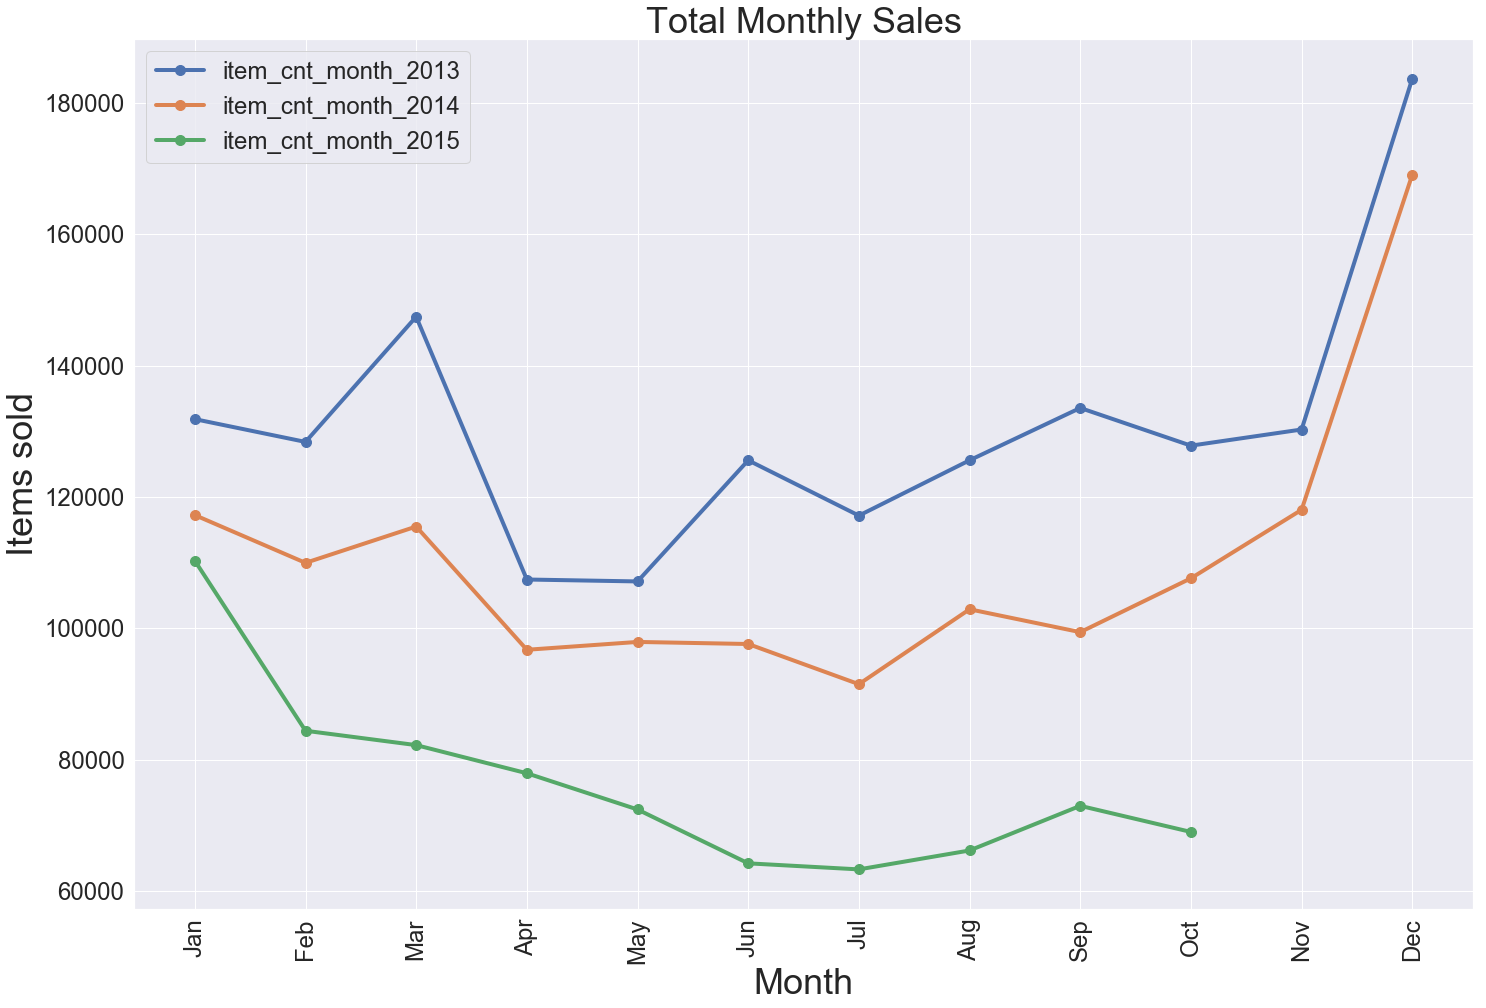

In [67]:
x = df_merged_trimmed['month']
#y = df_merged_trimmed['item_cnt_month_2013', 'item_cnt_month_2014', 'item_cnt_month_2015']
plt.subplots(figsize=(24,16))
_ = plt.plot(x, df_merged_trimmed['item_cnt_month_2013'], marker='.', markersize=20, linewidth=4)#, linestyle='none')
_ = plt.plot(x, df_merged_trimmed['item_cnt_month_2014'], marker='.', markersize=20, linewidth=4)
_ = plt.plot(x, df_merged_trimmed['item_cnt_month_2015'], marker='.', markersize=20, linewidth=4)
_ = plt.xlabel('Month', fontsize=36)
_ = plt.xticks(rotation=90, fontsize=24)
_ = plt.ylabel('Items sold', fontsize=36)
_ = plt.yticks(fontsize=24)
_ = plt.title('Total Monthly Sales', fontsize=36)
plt.legend(fontsize=24)
plt.show()

In [68]:
#df_merged_trimmed.plot(x='month', y=['item_cnt_month_2013', 'item_cnt_month_2014', 'item_cnt_month_2015'], 
#                       figsize=(24,16))